initial package import

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#### 4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [3]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


#### 5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [4]:
gdp_df.shape

(8219, 4)

There are 8,219 rows and 4 columns in the data set.

In [5]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

The data types of the columns are 
- Country or Area : object (text)
- Year: integer
- Value: float
- Value Footnotes: float

#### 6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [6]:
gdp_df = gdp_df.drop(columns = 'Value Footnotes').rename(columns = {'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


#### 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [7]:
date_span = gdp_df['Year'].max() - gdp_df['Year'].min() + 1

country_obs = gdp_df.groupby('Country').count().drop(columns = 'Year').rename(columns = {'GDP_Per_Capita': 'Count'})

country_obs[country_obs['Count'] == date_span].shape

(228, 1)

228 countries* have data for all years

`* Some of these are regions, not countries

In [8]:
country_obs[country_obs['Count'] != date_span]

,Count
Country,
Afghanistan,24
Bhutan,33
Cayman Islands,18
CuraÃ§ao,24
Djibouti,11
Faroe Islands,16
Greenland,32
Kosovo,16
Lebanon,33


 The countries missing data tend to be ones that have experienced significant turmoil during the time period, were only established as countries during the time period, and many are very small countries.

In [9]:
year_obs = gdp_df.groupby('Year').count().drop(columns = 'GDP_Per_Capita').rename(columns = {'Country': "Count"})

year_obs

,Count
Year,
1990,233
1991,234
1992,234
1993,234
1994,235
1995,236
1996,236
1997,238
1998,238


Up until 2022, the number of observations made increased or stayed the same each year.  However there was one fewer country observed in 2022, and six fewer in 2023 (as compared to the maximum number of annual observations).

#### 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. 
- Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section.
- Create a histogram, a density plot, a boxplot, and a violin plot.
- What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [10]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]

Text(0.5, 1.0, '2020 GDPs Across The World')

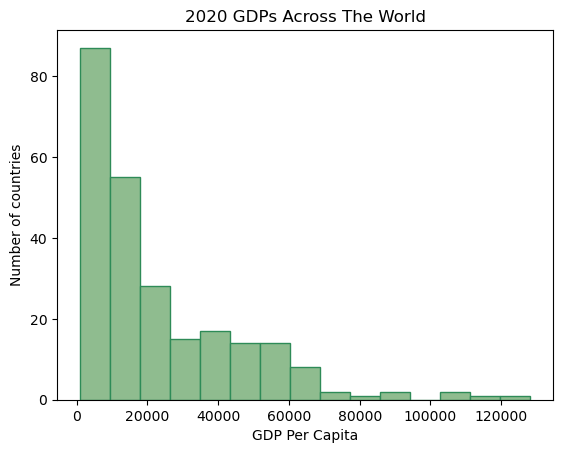

In [11]:
plt.hist(gdp_2020['GDP_Per_Capita'], bins = 15, edgecolor = 'SeaGreen', color = 'DarkSeaGreen')
plt.xlabel('GDP Per Capita')
plt.ylabel('Number of countries')
plt.title('2020 GDPs Across The World')

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

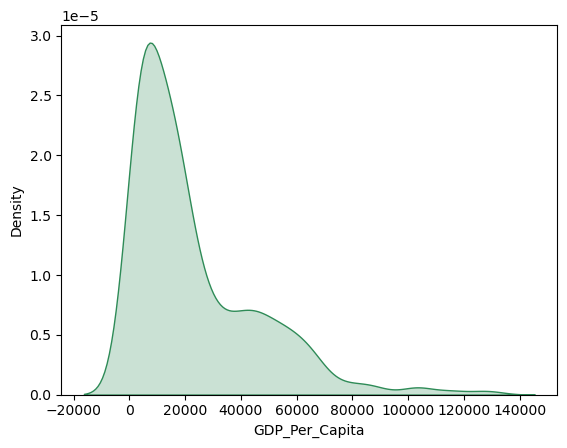

In [12]:
sns.kdeplot(gdp_2020['GDP_Per_Capita'], fill = True, color = 'SeaGreen', bw_method = .25)

<Axes: ylabel='GDP_Per_Capita'>

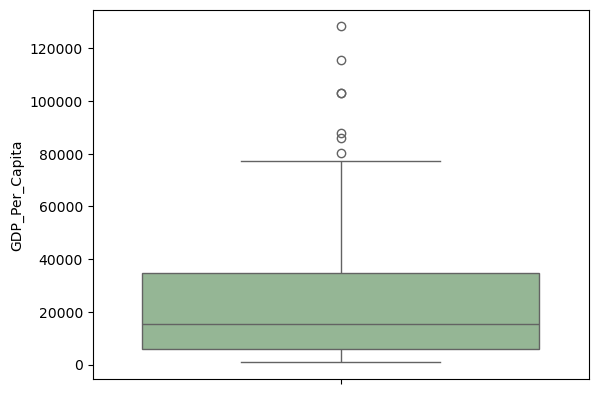

In [13]:
sns.boxplot(gdp_2020['GDP_Per_Capita'], color = 'DarkSeaGreen')

<Axes: ylabel='GDP_Per_Capita'>

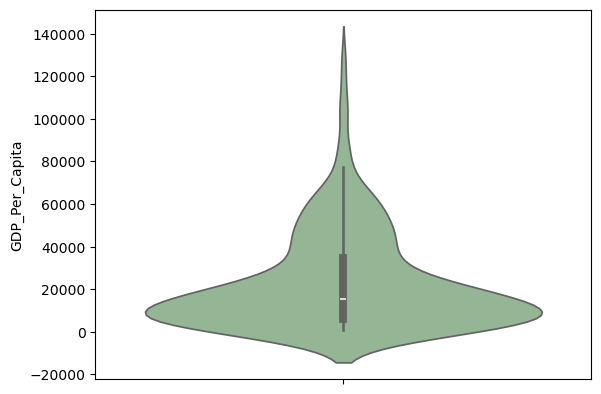

In [14]:
sns.violinplot(gdp_2020['GDP_Per_Capita'], color = 'DarkSeaGreen')

The box plot doesn't provide information about the "shape" of the distribution or how big the sample size is.  The density and violin plots provide the shape information, but still give a sense for the sample size.  The classic histogram, while maybe a little boring, gives a sense both for the shape of the distribution and how many measurements are in it.

The beeswarm is also fun:

<Axes: xlabel='GDP_Per_Capita'>

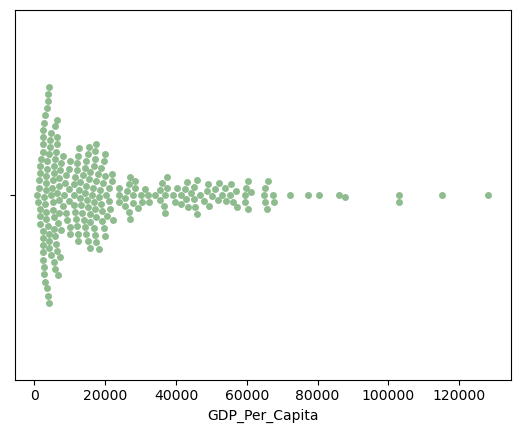

In [15]:
sns.swarmplot(x = gdp_2020['GDP_Per_Capita'], color = 'DarkSeaGreen')

#### 9. What was the median GDP per capita value in 2020?

In [16]:
med_2020 = gdp_2020['GDP_Per_Capita'].describe().loc['50%']

In [17]:
print('The median GDP per capita in 2020 was', '{:,.2f}'.format(med_2020))

The median GDP per capita in 2020 was 15,309.24


The median GDP per capita in 2020 was 15,309.24

#### 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn) 
  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

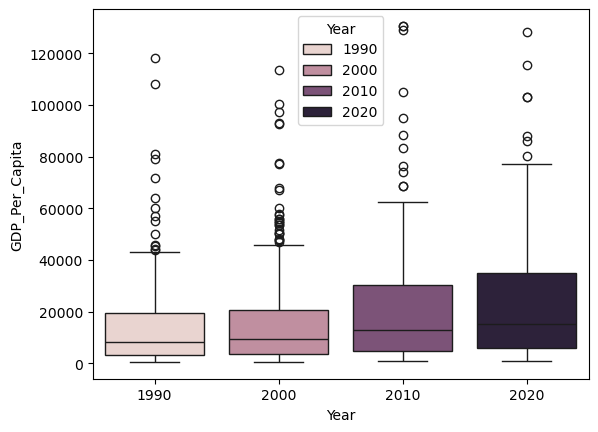

In [18]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]

sns.boxplot(x = gdp_decades['Year'], y = gdp_decades['GDP_Per_Capita'], hue = gdp_decades['Year']);

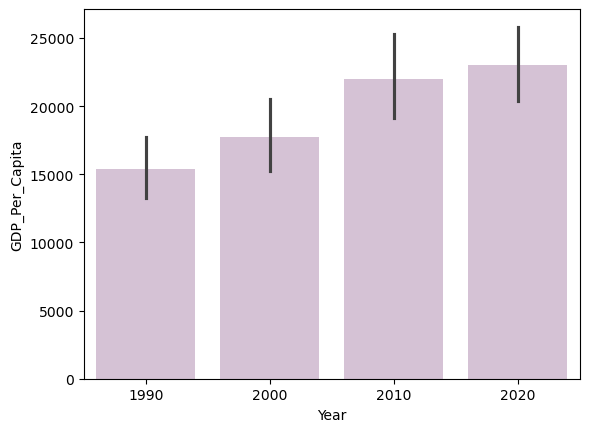

In [19]:
sns.barplot(x = gdp_decades['Year'], y = gdp_decades['GDP_Per_Capita'], color = 'Thistle');

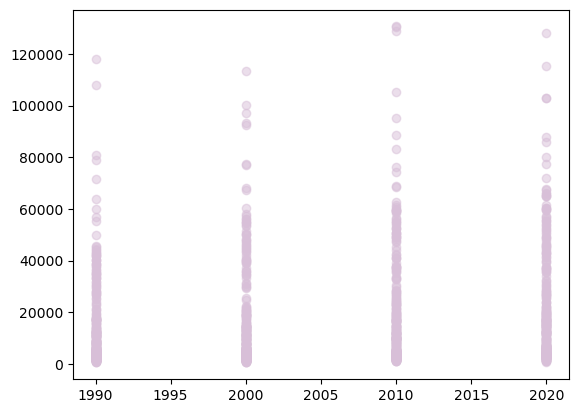

In [20]:
plt.scatter('Year', 'GDP_Per_Capita', data = gdp_decades, color = 'Thistle', alpha = 0.5);

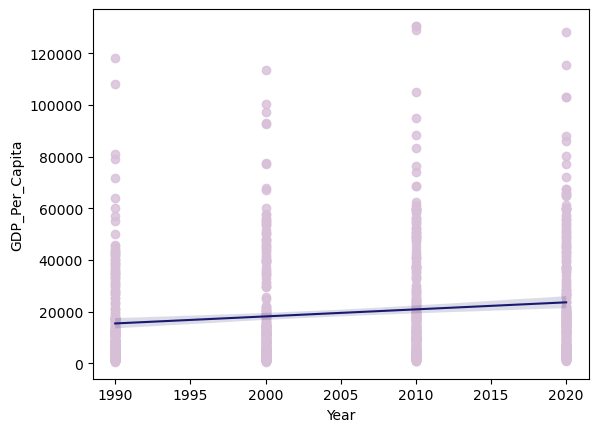

In [21]:
sns.regplot(x = gdp_decades['Year'], 
                y = gdp_decades['GDP_Per_Capita'], 
                color = 'Thistle', 
                line_kws = {'color':'MidnightBlue', 'linewidth': 1.5});

Honestly I don't necessarily love any of these for displaying how per capita GDPs have changed over time, but I think the boxplot is probably my favorite.

 Would love to try and do this as a ridgeline.... https://python-graph-gallery.com/ridgeline-graph-seaborn/  
 But that was very complicated, so I've settled for overlapping densities:

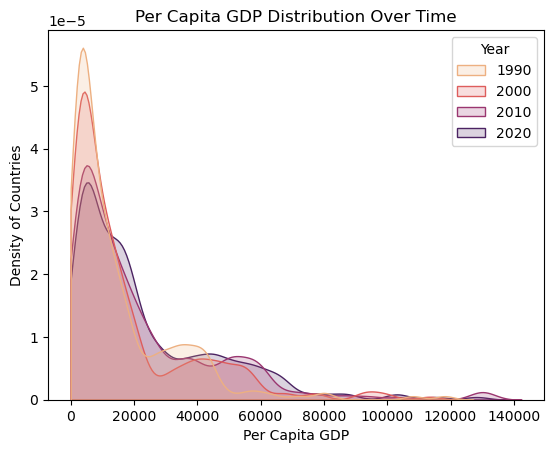

In [22]:
sns.kdeplot(gdp_decades, x = 'GDP_Per_Capita', 
            hue = 'Year',  fill = True, palette = 'flare', bw_adjust = .5, clip = (0, 200000), multiple = 'layer', common_norm = False, alpha = .2)
plt.xlabel('Per Capita GDP')
plt.ylabel('Density of Countries')
plt.title('Per Capita GDP Distribution Over Time');

#### 11. Which country was the first to have a GDP per capita greater than $100,000?

In [23]:
first_100k = gdp_df[gdp_df['GDP_Per_Capita'] > 100000]['Year'].min()

In [24]:
gdp_df[(gdp_df['GDP_Per_Capita'] > 100000) & (gdp_df['Year'] == first_100k)]

,Country,Year,GDP_Per_Capita
974,Brunei,1990,118163.683198
7827,United Arab Emirates,1990,108057.042464


Brunei and the UAE both had per capita GDPs greater than $100k in 1990, the first year of the dataset.

#### 12. Which country had the highest GDP per capita in 2020? 
Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [25]:
gdp_df[gdp_df['Year'] == 2020].sort_values(['GDP_Per_Capita'], ascending = False).head(1)

,Country,Year,GDP_Per_Capita
4426,Luxembourg,2020,128256.560341


Luxembourg had the highest GDP per capita in 2020, at $128.3k

In [26]:
lux_df = gdp_df[gdp_df['Country'] == 'Luxembourg']

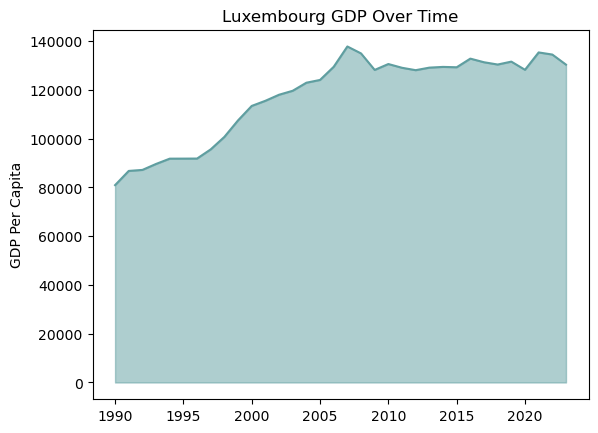

In [27]:
plt.fill_between(lux_df['Year'], lux_df['GDP_Per_Capita'], color = 'CadetBlue', alpha = 0.5)
plt.plot(lux_df['Year'], lux_df['GDP_Per_Capita'], color = 'CadetBlue', linewidth =  1.5)
plt.ylabel('GDP Per Capita')
plt.title('Luxembourg GDP Over Time');

#### 13. Which country had the lowest GDP per capita in 2020? 
- Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.
- **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [28]:
gdp_df[gdp_df['Year'] == 2020].sort_values(['GDP_Per_Capita'], ascending = True).head(1)

,Country,Year,GDP_Per_Capita
1046,Burundi,2020,833.920257


Burundi had the lowest per capita GDP in 2020, at $833

In [29]:
bur_df = gdp_df[gdp_df['Country'] == 'Burundi']

Text(0.5, 1.0, 'Burundi GDP Over Time')

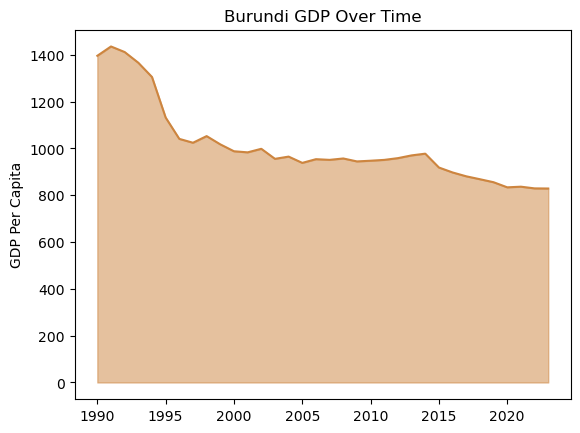

In [30]:
plt.fill_between(bur_df['Year'], bur_df['GDP_Per_Capita'], color = 'Peru', alpha = 0.5)
plt.plot(bur_df['Year'], bur_df['GDP_Per_Capita'], color = 'Peru', linewidth = 1.5)
plt.ylabel('GDP Per Capita')
plt.title('Burundi GDP Over Time')

In [31]:
gdp_pivot = gdp_df[gdp_df['Year'].isin([1990, 2020])].pivot_table(values = 'GDP_Per_Capita', index = 'Country', columns = 'Year').dropna().reset_index().rename(columns = {2020: 'yr_2020', 1990: 'yr_1990'})

In [32]:
gdp_pivot['Change'] = np.select(
    [gdp_pivot['yr_2020'] > gdp_pivot['yr_1990'], gdp_pivot['yr_2020'] < gdp_pivot['yr_1990'], gdp_pivot['yr_2020'] == gdp_pivot['yr_1990']],
    ['increase', 'decrease', 'no change'], 'N/A'
)

In [33]:
gdp_pivot.drop(columns = ['yr_1990', 'yr_2020']).groupby('Change').count().reset_index().rename(columns = {'Year': 'Index'})

Year,Change,Country
0,decrease,24
1,increase,209


In [34]:
gdp_pivot[gdp_pivot['Change'] == 'decrease']

Year,Country,yr_1990,yr_2020,Change
10,Aruba,34579.220640,28521.688852,decrease
16,Barbados,16976.761648,15749.038017,decrease
27,Brunei,118163.683198,80280.897948,decrease
30,Burundi,1396.077627,833.920257,decrease
36,Central African Republic,1481.252551,1136.570530,decrease
43,Congo,8699.526839,6350.509134,decrease
49,Dem. Rep. Congo,2172.001597,1277.632863,decrease
71,Fragile and conflict affected situations,6062.707946,5271.014406,decrease
73,Gabon,23884.810700,18681.484074,decrease
84,Haiti,3946.365646,3229.475544,decrease


**Bonus**: In general, most countries with data for both 1990 and 2020 (209 total) had a higher GDP in 2020.  Only 24 "countries" (not all of the rows are countries) had a lower GDP in 2020 than in 1990.

#### 14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. 
- Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [35]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 6083)

In [36]:
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


In [37]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083 entries, 0 to 6082
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6083 non-null   object 
 1   Year             6083 non-null   int64  
 2   Value            6083 non-null   float64
 3   Value Footnotes  2826 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 190.2+ KB


#### 15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [38]:
internet_df = internet_df.drop(columns = 'Value Footnotes').rename(columns = {'Country or Area': 'Country', 'Value': 'Internet_Users_Pct'})

#### 16. Look at the number of observations in this dataset per year. What do you notice?

In [39]:
internet_df['Year'].value_counts().to_frame().sort_values('Year')

,count
Year,
1990,226
1991,39
1992,50
1993,66
1994,92
1995,141
1996,177
1997,188
1998,195


1990 has the most rows (presumably lots of 0s), and then 1991 - 1994 and 2023 have significantly fewer rows.  
The low numbers for 91-94 are to be expected as internet access spread around the world.  The 2023 low number is likely due to this dataset having been saved before complete numbers for 2023 were available.

#### 17. What is the first year to have a non-zero internet users percentage value?

In [40]:
internet_df[internet_df['Internet_Users_Pct'] > 0]['Year'].min()

1990

1990 is the first year to have a non-zero value for internet users percentage.

#### 18. How does the distribution of internet users percent differ for 2000 and 2014?

In [41]:
subset_internet = internet_df[(internet_df['Year'] == 2000) | (internet_df['Year'] == 2014)]

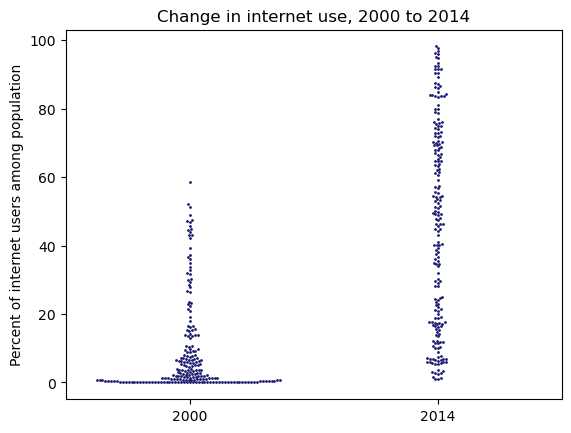

In [42]:
sns.swarmplot(x = subset_internet['Year'], y = subset_internet['Internet_Users_Pct'], size = 2, color = 'MidnightBlue')
plt.xlabel('')
plt.ylabel('Percent of internet users among population')
plt.title('Change in internet use, 2000 to 2014');

The distribution is much more even in 2014, whereas in 2000 the vast majority of countires had fewer than 20% of their population as internet users.

#### 19. For how many countries was the percentage of internet users below 5% in 2014?

In [43]:
print(internet_df[(internet_df['Year'] == 2014) & (internet_df['Internet_Users_Pct'] < 5.0)]['Country'].count())

10


10 countries had fewer than 5% of their population as internet users in 2014

#### 20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. 
- Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [44]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, left_on = ['Country', 'Year'], right_on = ['Country', 'Year'], how = 'outer')
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,1990,NaN,0.000000
1,Afghanistan,2000,1617.826475,NaN
2,Afghanistan,2001,1454.110782,0.004723
3,Afghanistan,2002,1774.308743,0.004561
4,Afghanistan,2003,1815.928200,0.087891
...,...,...,...,...
9494,Zimbabwe,2019,3294.806084,26.588300
9495,Zimbabwe,2020,2987.269823,29.298600
9496,Zimbabwe,2021,3184.785451,32.461600
9497,Zimbabwe,2022,3323.121932,32.561500


#### 21. Find the three countries with the highest internet users percentage in 2014. 
- Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [45]:
top_countries = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014].sort_values('Internet_Users_Pct', ascending = False).head(3)[['Country']].squeeze()

The three countries with the highest percentage of internet users in 2014 were Iceland, the Falkland Islands, and Bermuda.

In [46]:
gdp_top_countries = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(top_countries)]

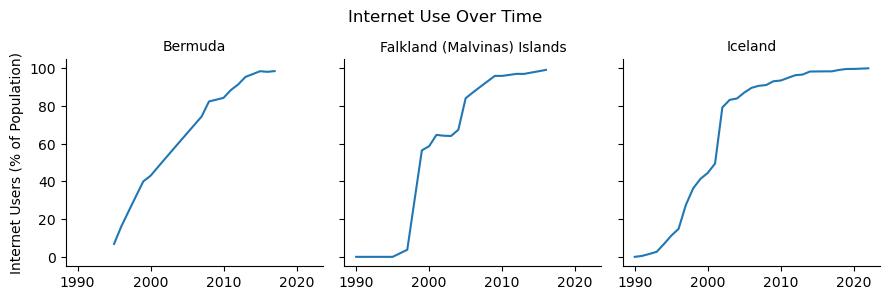

In [47]:
g = sns.FacetGrid(gdp_top_countries, col = 'Country')
g.map(plt.plot, 'Year', 'Internet_Users_Pct')
g.set_ylabels('Internet Users (% of Population)')
g.set_xlabels('')
g.set_titles('{col_name}')
g.fig.suptitle('Internet Use Over Time', y = 1.05);

All 3 had near-100% rates of internet usage by 2014, and relatively rapid rates of adoption (particularly in Iceland and the Falkland Islands).

#### 22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [48]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014].reset_index(drop = True)

#### 23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? 
If you see any unusual points, investigate them.

<Axes: xlabel='GDP_Per_Capita', ylabel='Internet_Users_Pct'>

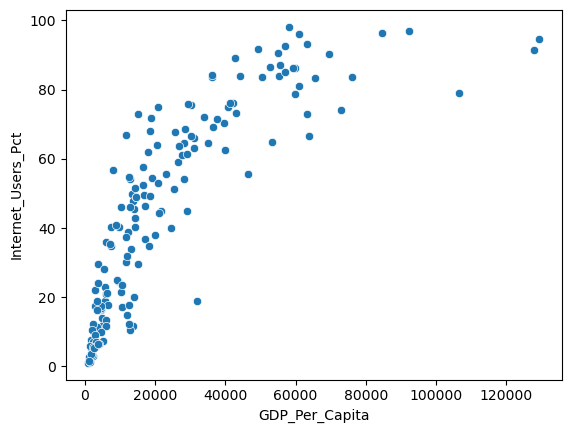

In [49]:
sns.scatterplot(x = gdp_and_internet_use_2014['GDP_Per_Capita'], y = gdp_and_internet_use_2014['Internet_Users_Pct'])

In [50]:
gdp_and_internet_use_2014[(gdp_and_internet_use_2014['GDP_Per_Capita'] < 40000) & (gdp_and_internet_use_2014['Internet_Users_Pct'] < 20)].sort_values('GDP_Per_Capita', ascending = False).head(1)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
76,Equatorial Guinea,2014,31765.899706,18.86


In [51]:
gdp_and_internet_use_2014[(gdp_and_internet_use_2014['GDP_Per_Capita'] > 100000) & (gdp_and_internet_use_2014['Internet_Users_Pct'] < 90)]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
225,Singapore,2014,106604.492771,79.0292


The chart illustrates that per capita GDP and the percentage of internet users had a strong logarithmic relationship in 2014.  It also makes wo countries stand out to me - Equatorial Guinea, and Singapore - which both have low percentages of internet users compared to other countries with similar per capita GDP rates, *particularly* Equatorial Guinea.

#### 24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. 
Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [52]:
gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], q = 3, labels = ['Low', 'Medium', 'High'])

In [53]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


#### 25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

In [54]:
gdp_and_internet_use_2014.groupby('GDP_group', observed = True)['Internet_Users_Pct'].quantile(.5)

GDP_group
Low       11.6000
Medium    44.5945
High      75.9800
Name: Internet_Users_Pct, dtype: float64

The median percentage of internet users is 11.6% for Low-GDP countries, but goes up to 44.6% for Medium and all the way up to 76.0% for High-GDP countries.

## Bonus exercise:
- Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.

In [55]:
literacy_df = pd.read_csv('../data/literacy.csv', nrows = 41055)

In [56]:
literacy_df

,Country or Area,Year,Area,Sex,Age,Literacy,Record Type,Reliability,Source Year,Value,Value Footnotes
0,Albania,2023,Total,Both Sexes,10 - 14,Total,Census - de jure - complete tabulation,"Final figure, complete",2024,136645.0,NaN
1,Albania,2023,Total,Both Sexes,10 - 14,Literate,Census - de jure - complete tabulation,"Final figure, complete",2024,135672.0,NaN
2,Albania,2023,Total,Both Sexes,10 - 14,Illiterate,Census - de jure - complete tabulation,"Final figure, complete",2024,973.0,NaN
3,Albania,2023,Total,Both Sexes,10 +,Total,Census - de jure - complete tabulation,"Final figure, complete",2024,2164829.0,NaN
4,Albania,2023,Total,Both Sexes,10 +,Literate,Census - de jure - complete tabulation,"Final figure, complete",2024,2116741.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
41050,Zimbabwe,2002,Total,Female,85 +,Illiterate,Census - de facto - complete tabulation,"Final figure, complete",2007,17456.0,NaN
41051,Zimbabwe,2002,Total,Female,85 +,Unknown,Census - de facto - complete tabulation,"Final figure, complete",2007,160.0,NaN
41052,Zimbabwe,2002,Total,Female,Unknown,Total,Census - de facto - complete tabulation,"Final figure, complete",2007,25139.0,NaN
41053,Zimbabwe,2002,Total,Female,Unknown,Literate,Census - de facto - complete tabulation,"Final figure, complete",2007,9143.0,NaN


#### Notes from exploration
- Record types: Indonesia and China (Macao SAR) are the only countries that used sample surveys instead of census data in some years.  I will be treating all record types the same, as I will be converting everything into percentages.
- This is a casual enough analysis that I will be ignoring both reliability and the footnote
- Age: there are many different ways age is grouped.  10+ is a very common grouping (appears 2,075 times out of a possible 3,828 country*year combinations) so I'm maaaybe just going to look at that

In [57]:
literacy_df = literacy_df.drop(columns = ['Area', 'Record Type', 'Reliability', 'Source Year', 'Value Footnotes'])

Now I filter for rows that look at the literacy rate for individuals of any sex ('Both Sexes') above the age of 10, so I can actually compare apples to apples

In [58]:
literacy_10 = literacy_df[(literacy_df['Age'] == '10 +') & (literacy_df['Sex'] == 'Both Sexes')]
literacy_10

,Country or Area,Year,Sex,Age,Literacy,Value
3,Albania,2023,Both Sexes,10 +,Total,2164829.0
4,Albania,2023,Both Sexes,10 +,Literate,2116741.0
5,Albania,2023,Both Sexes,10 +,Illiterate,48088.0
156,Albania,2011,Both Sexes,10 +,Total,2454948.0
157,Albania,2011,Both Sexes,10 +,Literate,2387409.0
...,...,...,...,...,...,...
40719,Zambia,2010,Both Sexes,10 +,Illiterate,1560573.0
40844,Zimbabwe,2002,Both Sexes,10 +,Total,8421284.0
40845,Zimbabwe,2002,Both Sexes,10 +,Literate,7782502.0
40846,Zimbabwe,2002,Both Sexes,10 +,Illiterate,630271.0


In [59]:
literacy_10 = pd.pivot_table(literacy_df, values = 'Value', index = ['Country or Area', 'Year'], columns = 'Literacy').reset_index()

In [60]:
literacy_10['Total Known'] = literacy_10['Illiterate'] + literacy_10['Literate']
literacy_10['known rate'] =  (literacy_10['Literate'] / literacy_10['Total Known']) * 100

In [61]:
literacy_10

Literacy,Country or Area,Year,Illiterate,Literate,Total,Unknown,Total Known,known rate
0,Albania,2001,3624.250000,2.245102e+05,2.281345e+05,NaN,2.281345e+05,98.411354
1,Albania,2011,7945.764706,2.808716e+05,2.888174e+05,NaN,2.888174e+05,97.248862
2,Albania,2023,3771.607843,1.660189e+05,1.697905e+05,NaN,1.697905e+05,97.778670
3,Algeria,1998,518529.411765,1.411210e+06,1.874398e+06,NaN,1.929739e+06,73.129563
4,Algeria,2008,392692.435254,1.365886e+06,1.764224e+06,5645.024982,1.758579e+06,77.669895
...,...,...,...,...,...,...,...,...
252,Viet Nam,1999,891986.333333,9.124479e+06,1.001963e+07,3163.000000,1.001647e+07,91.094799
253,Viet Nam,2009,743693.523810,1.159650e+07,1.235309e+07,12902.095238,1.234019e+07,93.973403
254,Zambia,2000,339910.666667,5.120470e+06,5.460381e+06,NaN,5.460381e+06,93.774964
255,Zambia,2010,160058.769231,7.071301e+05,8.671888e+05,NaN,8.671888e+05,81.542801


#### Adding in GDP and internet data

In [62]:
literacy_expand = pd.merge(literacy_10, gdp_and_internet_use, how = 'left', left_on = ['Country or Area', 'Year'], right_on = ['Country', 'Year']).drop(columns = 'Country').rename(columns = {'Country or Area': 'Country'})

In [63]:
literacy_expand

,Country,Year,Illiterate,Literate,Total,Unknown,Total Known,known rate,GDP_Per_Capita,Internet_Users_Pct
0,Albania,2001,3624.250000,2.245102e+05,2.281345e+05,NaN,2.281345e+05,98.411354,7109.627581,0.325798
1,Albania,2011,7945.764706,2.808716e+05,2.888174e+05,NaN,2.888174e+05,97.248862,12199.310455,47.000000
2,Albania,2023,3771.607843,1.660189e+05,1.697905e+05,NaN,1.697905e+05,97.778670,17975.798395,NaN
3,Algeria,1998,518529.411765,1.411210e+06,1.874398e+06,NaN,1.929739e+06,73.129563,11094.887537,0.020239
4,Algeria,2008,392692.435254,1.365886e+06,1.764224e+06,5645.024982,1.758579e+06,77.669895,14206.776715,10.180000
...,...,...,...,...,...,...,...,...,...,...
252,Viet Nam,1999,891986.333333,9.124479e+06,1.001963e+07,3163.000000,1.001647e+07,91.094799,4119.053672,0.128927
253,Viet Nam,2009,743693.523810,1.159650e+07,1.235309e+07,12902.095238,1.234019e+07,93.973403,6914.338636,26.550000
254,Zambia,2000,339910.666667,5.120470e+06,5.460381e+06,NaN,5.460381e+06,93.774964,2220.565371,0.191072
255,Zambia,2010,160058.769231,7.071301e+05,8.671888e+05,NaN,8.671888e+05,81.542801,3266.507493,3.000000


In [64]:
literacy_expand[['GDP_Per_Capita', 'Internet_Users_Pct']].corr()

,GDP_Per_Capita,Internet_Users_Pct
GDP_Per_Capita,1.000000,0.516467
Internet_Users_Pct,0.516467,1.000000


#### Time to make some plots!

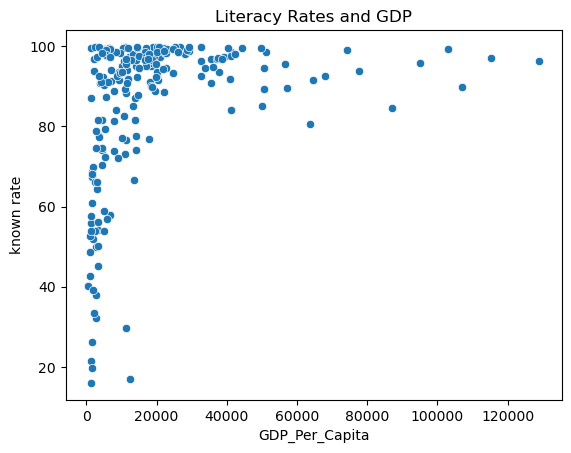

In [75]:
sns.scatterplot(x = literacy_expand['GDP_Per_Capita'], y = literacy_expand['known rate'])

plt.title('Literacy Rates and GDP');

Back to exploration: since we covered it in lecture this morning, *this* is where I should have started:

In [80]:
literacy_df.groupby('Country or Area')['Year'].nunique().describe()

count    132.000000
mean       1.946970
std        0.840886
min        1.000000
25%        1.000000
50%        2.000000
75%        2.250000
max        4.000000
Name: Year, dtype: float64

Most countries only have a couple of years of observations in the data set, so trying to get time analysis or comparing with GDP isn't going to be as interesting as I hoped for =(